In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


import matplotlib.pyplot as plt
import sampyl as smp
from sampyl import np
import sys
sys.path.append('..')
from TaylorF2 import TaylorF2

# Autograd throws some warnings that are useful, but this is
# a demonstration, so I'll squelch them.
import warnings

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
n_points = 200
rescaling = 1e3 # Neural networks seem to work better with normalized data

Mf_max = 1.0/(6**(3.0/2.0) * np.pi) # cut at ISCO
Mf_array = np.linspace(1e-3, Mf_max, n_points) # Geometric frequency

In [5]:
pn = TaylorF2(5., 10., 0. , 0.)

/Users/Rhys/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


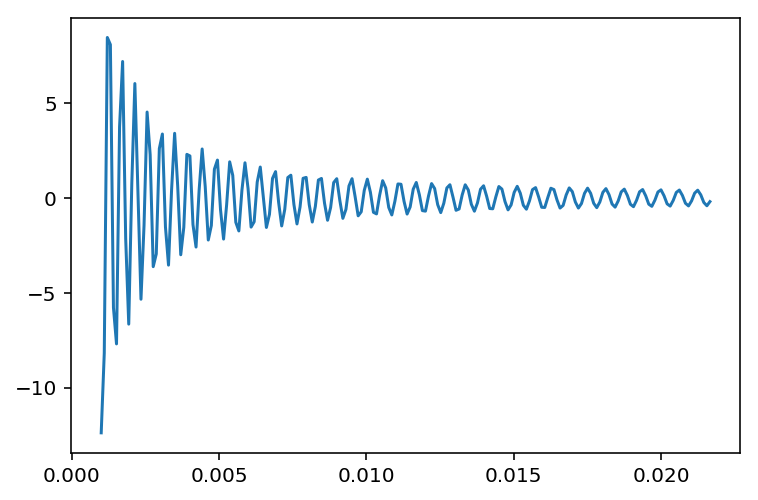

In [6]:
Mf0 = 0.01
A0 =1.
strain = pn.compute_strain(Mf_array, Mf0 , A0)
plt.plot(Mf_array , strain)

In [33]:
def GW_loglike(m1, m2 , chi1 , chi2, sig):
    model = smp.Model()
    # Estimate from our data and coefficients
    wave = TaylorF2(m1 , m2 , chi1 , chi2)
    inf_strain = wave.compute_strain(Mf_array, Mf0 , A0)
    # Add log-likelihood
    model.add(smp.normal(strain, mu = inf_strain, sig=sig)) 
    # Add prior for estimate error
    # Uniform priors on coefficients
    model.add(smp.normal(m1, mu = 5, sig = 20))
    model.add(smp.normal(m1, mu = 10, sig = 20))
    model.add(smp.normal(chi1, mu = 0, sig = 0.5))
    model.add(smp.normal(chi2, mu = 0, sig = 0.5))
    return model()

In [40]:
start = {'m1': 1 , 'm2':2 ,'chi1': 1. 
         ,'chi2': 1. ,'sig': 1.}
sampler = smp.Metropolis(GW_loglike, start)
chain = sampler(1500 , burn=1000, thin=4)

Progress: [##############################] 1500 of 1500 samples


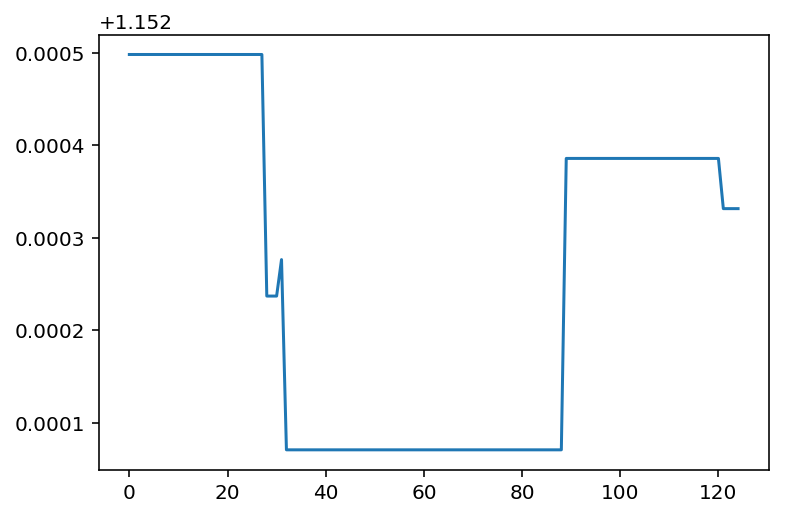

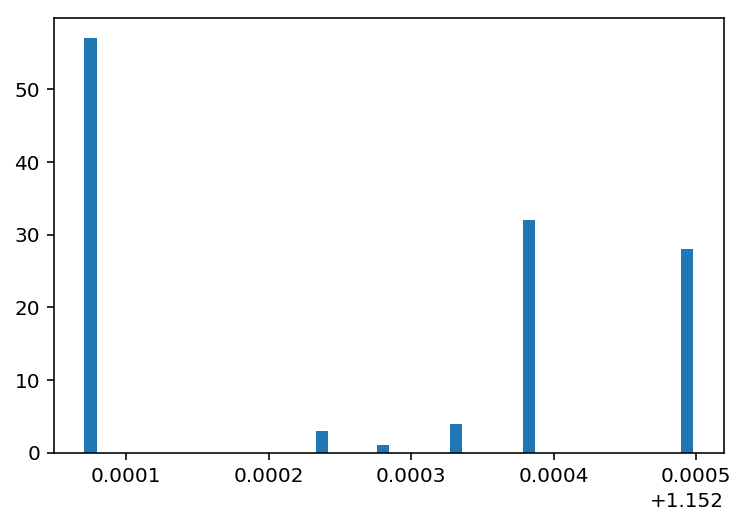

In [41]:
plt.figure()
plt.plot(chain.chi2)
plt.figure()
plt.hist(chain.chi2, bins=50)
plt.show()